In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/20_3, MCD.csv'
filename_clean = '../csv_detection_info_clean/20_3, MCD.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/20/3, MCD'

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
103  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
104  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
105  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
106  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
107  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.82.1.1.1314.669053978.192.168.20.208...     1376     1559   
1           1.2.276.0.95.17407.20201127.112320.0.0.dcm     1148     1344   
2             1.2.276.0.95.29487.20200514.105020.0.dcm      780      940   
3    1.2.276.0.95.31933.1.20200701.152911.0.2.1597.dcm      631      816   
4    1.2.276.0.95.31933.1.20200701.153229.0.2.1598.dcm      721      908   
..                                                 ...      ...      ...   
103  1.3.51.0.7.4142677725.39713.55626.43115.37729....      309      449   
104  1.3.51.0.7.498005215.51986.25674.43513.56708.1...        0        0   
105  1.3.51.0.7.547468819.29556.55370.43475.52374.1...      705      856   
106  1.3.51.0.7.793893706.7631.16456.43393.32232.30...      717      926   
107  1.3.51.0.7.85612821.8244.64589.39355.17825.912...      723      860   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0       1779     1963    0.329260    20          3        3, MCD  
1        641      837    0.993546    20          3        3, MCD  
2        413      573    0.923225    20          3        3, MCD  
3       1145     1329    0.995034    20          3        3, MCD  
4       1044     1231    0.992351    20          3        3, MCD  
..       ...      ...         ...   ...        ...           ...  
103      802      942    0.999990    20          3        3, MCD  
104        0        0    0.000000    20          3        3, MCD  
105      542      693    0.999998    20          3        3, MCD  
106     1434     1643    0.998783    20          3        3, MCD  
107      343      481    0.999991    20          3        3, MCD  

[108 rows x 10 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [10]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([0, 26, 60, 98, 104], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

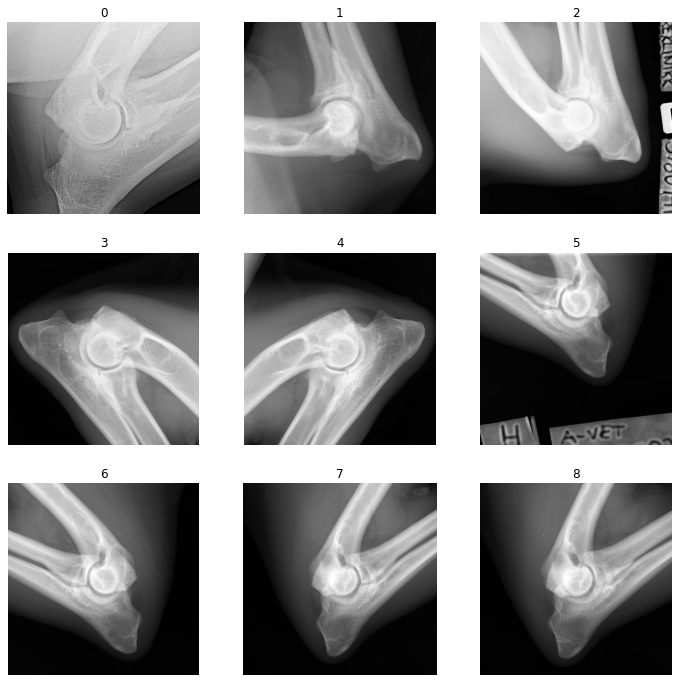

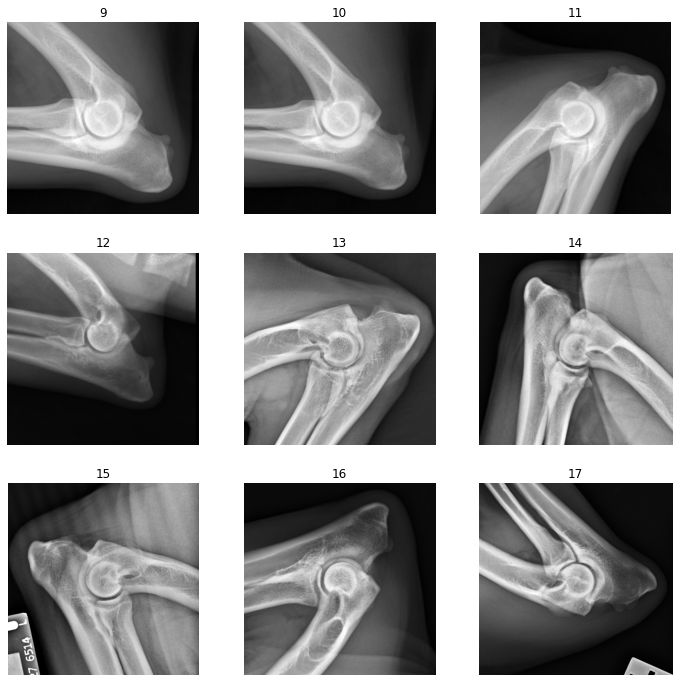

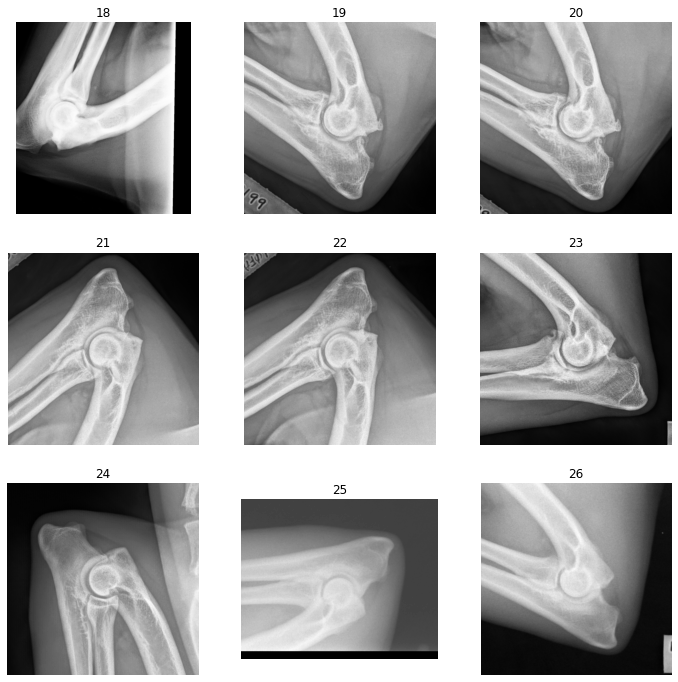

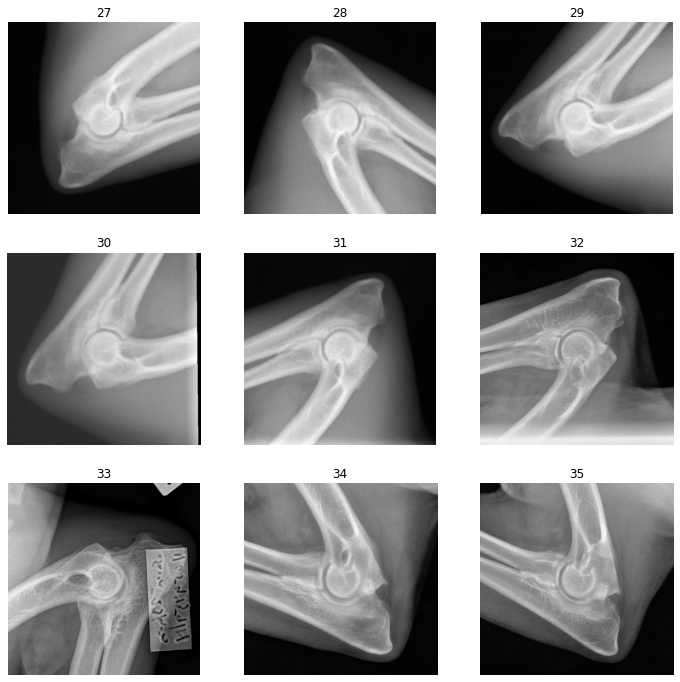

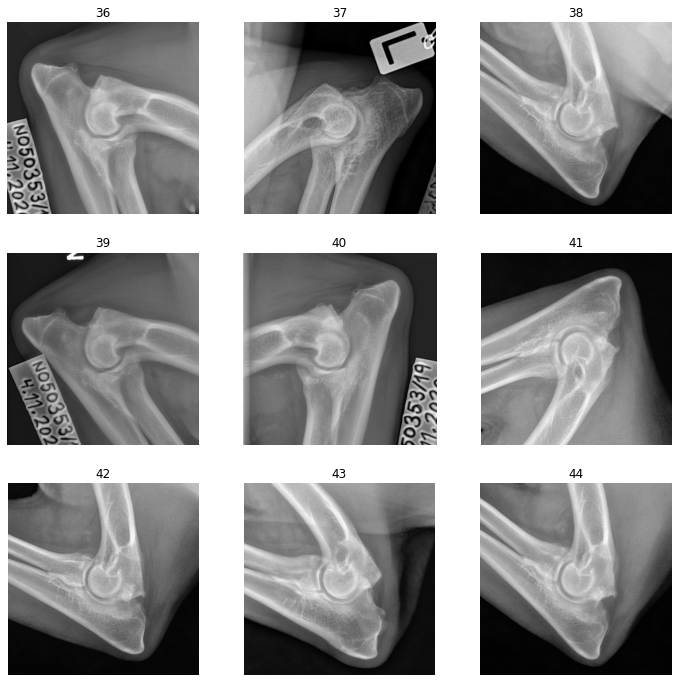

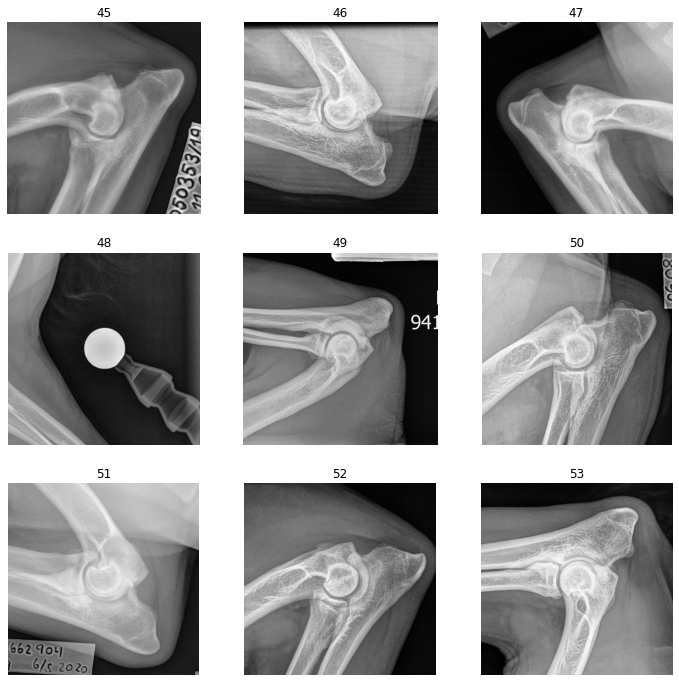

C:\NMBU\TEMP\ipykernel_4748\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_4748\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


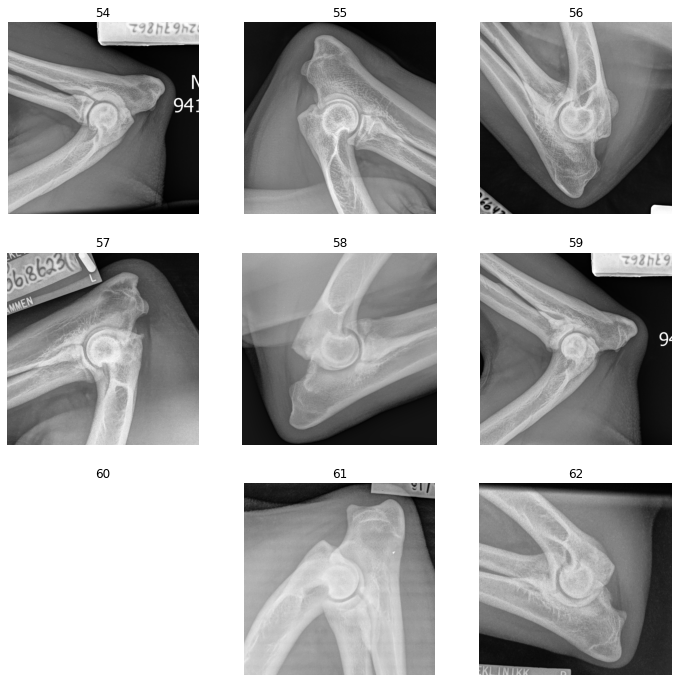

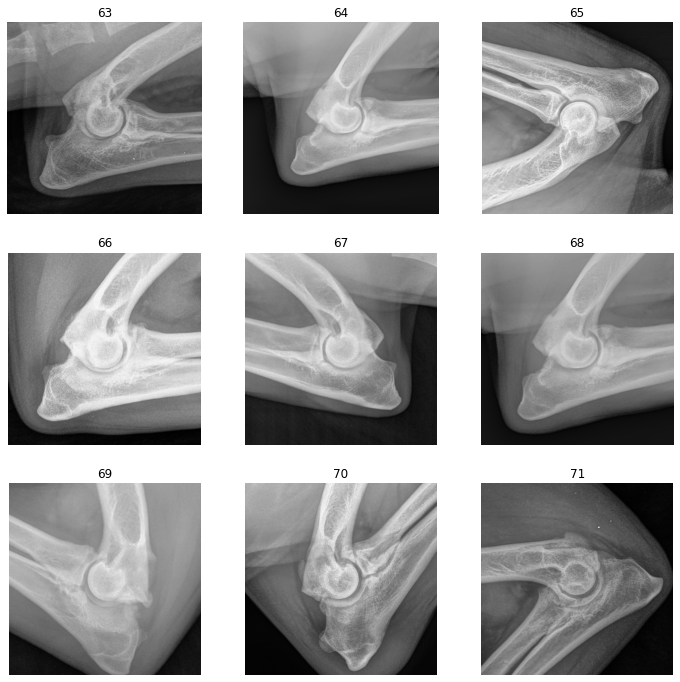

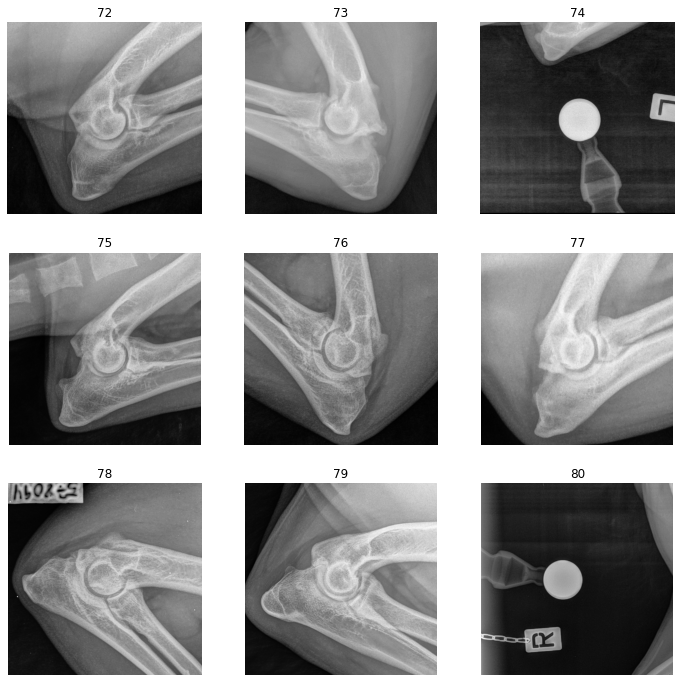

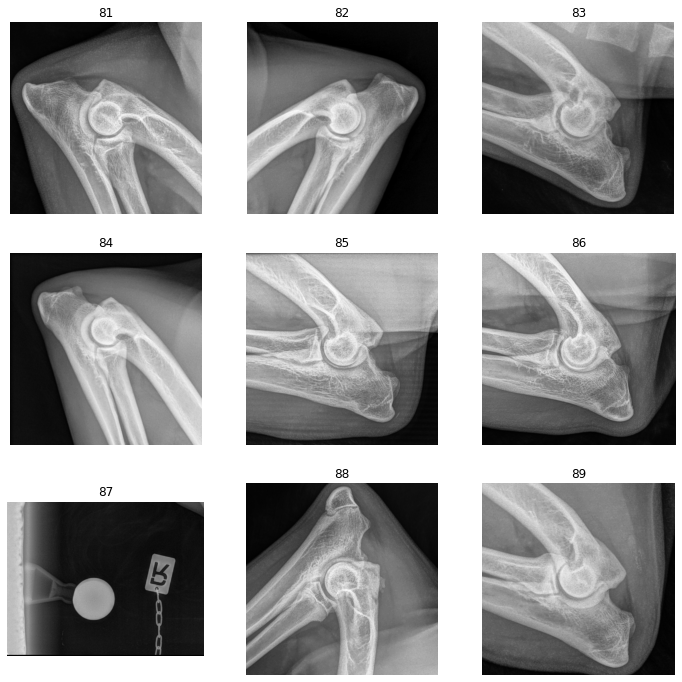

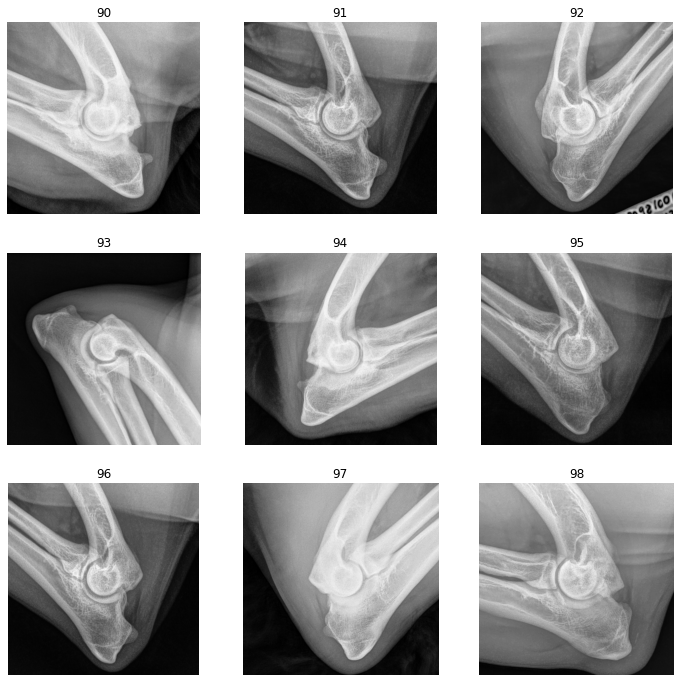

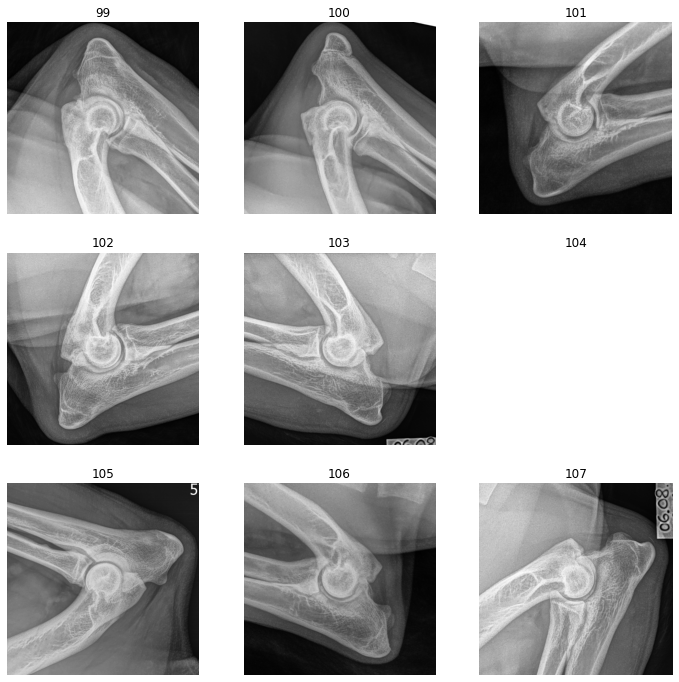

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [11]:
remove_indice = [48, 60, 80, 87, 104]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
102  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
103  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
105  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
106  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
107  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.82.1.1.1314.669053978.192.168.20.208...     1376     1559   
1           1.2.276.0.95.17407.20201127.112320.0.0.dcm     1148     1344   
2             1.2.276.0.95.29487.20200514.105020.0.dcm      780      940   
3    1.2.276.0.95.31933.1.20200701.152911.0.2.1597.dcm      631      816   
4    1.2.276.0.95.31933.1.20200701.153229.0.2.1598.dcm      721      908   
..                                                 ...      ...      ...   
102  1.3.51.0.7.4055757528.58223.14917.39718.35683....      430      589   
103  1.3.51.0.7.4142677725.39713.55626.43115.37729....      309      449   
105  1.3.51.0.7.547468819.29556.55370.43475.52374.1...      705      856   
106  1.3.51.0.7.793893706.7631.16456.43393.32232.30...      717      926   
107  1.3.51.0.7.85612821.8244.64589.39355.17825.912...      723      860   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0       1779     1963    0.329260    20          3        3, MCD  
1        641      837    0.993546    20          3        3, MCD  
2        413      573    0.923225    20          3        3, MCD  
3       1145     1329    0.995034    20          3        3, MCD  
4       1044     1231    0.992351    20          3        3, MCD  
..       ...      ...         ...   ...        ...           ...  
102      756      915    0.999994    20          3        3, MCD  
103      802      942    0.999990    20          3        3, MCD  
105      542      693    0.999998    20          3        3, MCD  
106     1434     1643    0.998783    20          3        3, MCD  
107      343      481    0.999991    20          3        3, MCD  

[103 rows x 10 columns]

In [12]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [13]:
new_detection_df.to_csv(filename_clean, index=False)